In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, distinct
from sqlalchemy.sql import label

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite",echo=True)
this_conn = engine.connect()

2021-07-23 17:50:45,468 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-07-23 17:50:45,469 INFO sqlalchemy.engine.base.Engine ()
2021-07-23 17:50:45,471 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-07-23 17:50:45,472 INFO sqlalchemy.engine.base.Engine ()


In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

2021-07-23 17:50:47,106 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2021-07-23 17:50:47,112 INFO sqlalchemy.engine.base.Engine ()
2021-07-23 17:50:47,115 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_xinfo("measurement")
2021-07-23 17:50:47,116 INFO sqlalchemy.engine.base.Engine ()
2021-07-23 17:50:47,119 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2021-07-23 17:50:47,120 INFO sqlalchemy.engine.base.Engine ('measurement',)
2021-07-23 17:50:47,122 INFO sqlalchemy.engine.base.Engine PRAGMA main.foreign_key_list("measurement")
2021-07-23 17:50:47,123 INFO sqlalchemy.engine.base.Engine ()
2021-07-23 17:50:47,125 INFO sqlalchemy.engine.base.Engine PRAGMA temp.foreign_key_list("measurement")
2021-07-23 17:50:47,126 INFO sqlalchemy.engine.base.Engine ()
2021-07-23 17:50:47,128 INFO sqlalchemy.engine.base.Engine SELEC

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
### Create the inspector and connect it to the engine
inspector = inspect(engine)

In [8]:
# Save references to each table
### Collect the names of tables within the database
inspector.get_table_names()

2021-07-23 17:50:51,890 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2021-07-23 17:50:51,891 INFO sqlalchemy.engine.base.Engine ()


['measurement', 'station']

In [9]:
# get columns for measurement table
meas_cols = inspector.get_columns('measurement')
for c in meas_cols:
    print(c['name'], c['type'])

2021-07-23 17:50:53,362 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_xinfo("measurement")
2021-07-23 17:50:53,365 INFO sqlalchemy.engine.base.Engine ()
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# get columns for station table
stat_cols = inspector.get_columns('station')
for c in stat_cols:
    print(c['name'], c['type'])

2021-07-23 17:50:54,806 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_xinfo("station")
2021-07-23 17:50:54,809 INFO sqlalchemy.engine.base.Engine ()
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# not sure I need these, but doing it because it was in very first activity Query All Records in the Database
measurement_data = engine.execute("SELECT * FROM measurement")
measurement_df = pd.read_sql("SELECT * FROM measurement", this_conn)

measurement_df.head()

2021-07-23 17:50:56,235 INFO sqlalchemy.engine.base.Engine SELECT * FROM measurement
2021-07-23 17:50:56,240 INFO sqlalchemy.engine.base.Engine ()
2021-07-23 17:50:56,245 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("SELECT * FROM measurement")
2021-07-23 17:50:56,248 INFO sqlalchemy.engine.base.Engine ()
2021-07-23 17:50:56,250 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("SELECT * FROM measurement")
2021-07-23 17:50:56,252 INFO sqlalchemy.engine.base.Engine ()
2021-07-23 17:50:56,256 INFO sqlalchemy.engine.base.Engine SELECT * FROM measurement
2021-07-23 17:50:56,262 INFO sqlalchemy.engine.base.Engine ()


,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [12]:
# not sure I need these, but doing it because it was in very first activity Query All Records in the Database
station_data = engine.execute("SELECT * FROM station")
station_df = pd.read_sql("SELECT * FROM station", this_conn)

station_df

2021-07-23 17:51:02,836 INFO sqlalchemy.engine.base.Engine SELECT * FROM station
2021-07-23 17:51:02,840 INFO sqlalchemy.engine.base.Engine ()
2021-07-23 17:51:02,845 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("SELECT * FROM station")
2021-07-23 17:51:02,846 INFO sqlalchemy.engine.base.Engine ()
2021-07-23 17:51:02,851 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("SELECT * FROM station")
2021-07-23 17:51:02,852 INFO sqlalchemy.engine.base.Engine ()
2021-07-23 17:51:02,855 INFO sqlalchemy.engine.base.Engine SELECT * FROM station
2021-07-23 17:51:02,856 INFO sqlalchemy.engine.base.Engine ()


,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [13]:
### Assign classes to variables 
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [16]:
# find most recent date in the database
last_date = session.query(func.max(Measurement.date)).first()
print(last_date)

2021-07-23 17:51:17,040 INFO sqlalchemy.engine.base.Engine SELECT max(measurement.date) AS max_1 
FROM measurement
 LIMIT ? OFFSET ?
2021-07-23 17:51:17,043 INFO sqlalchemy.engine.base.Engine (1, 0)
('2017-08-23',)


## Design a query to retrieve the last 12 months of precipitation data and plot the results. 

In [17]:
# Starting from the most recent data point in the database. 
# The date that was pulled was a tuple & I saw online to use a marker to pull just the date 
# end_date = dt.date(last_date[0])  # The date is 2017-08-23; *the code DOES WORK, but I hard-coded to be sure*
end_hand = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
# start_date = end_date - dt.timedelta(days=365)  # THIS date should be 2016-08-24; hadn't gotten to work yet
start_hand = dt.date(2016, 8, 24) 
print(f'start date is {start_hand} & end date is {end_hand}')

start date is 2016-08-24 & end date is 2017-08-23


sel = [Dow.stock, 
       func.avg(Dow.open_price), 
       func.avg(Dow.high_price), 
       func.avg(Dow.low_price), 
       func.avg(Dow.close_price)]
may_averages = session.query(*sel).\
    filter(func.strftime("%m", Dow.date) == "05").\
    group_by(Dow.stock).\
    order_by(Dow.stock).all()
may_averages

In [25]:
# V0 produces list of tuples; has appropriate dates, but need to collapse so there is only 1 pair per date
precip_output0 = session.query(Measurement.id, Measurement.date, Measurement.prcp).\
    filter(Measurement.date >=start_hand).all()
    # group_by(Measurement.date).all()
    # order_by(Measurement.date)
    # all()

2021-07-23 17:55:30,868 INFO sqlalchemy.engine.base.Engine SELECT measurement.id AS measurement_id, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp 
FROM measurement 
WHERE measurement.date >= ?
2021-07-23 17:55:30,871 INFO sqlalchemy.engine.base.Engine ('2016-08-24',)


In [26]:
len(precip_output0)

2223

In [27]:
print(precip_output0)

[(2365, '2016-08-24', 0.08), (2366, '2016-08-25', 0.08), (2367, '2016-08-26', 0.0), (2368, '2016-08-27', 0.0), (2369, '2016-08-28', 0.01), (2370, '2016-08-29', 0.0), (2371, '2016-08-30', 0.0), (2372, '2016-08-31', 0.13), (2373, '2016-09-01', 0.0), (2374, '2016-09-02', 0.0), (2375, '2016-09-03', 0.0), (2376, '2016-09-04', 0.03), (2377, '2016-09-05', None), (2378, '2016-09-06', None), (2379, '2016-09-07', 0.05), (2380, '2016-09-08', 0.0), (2381, '2016-09-09', 0.03), (2382, '2016-09-10', 0.0), (2383, '2016-09-11', 0.05), (2384, '2016-09-12', 0.0), (2385, '2016-09-13', 0.02), (2386, '2016-09-14', 1.32), (2387, '2016-09-15', 0.42), (2388, '2016-09-16', 0.06), (2389, '2016-09-17', 0.05), (2390, '2016-09-18', 0.0), (2391, '2016-09-19', 0.0), (2392, '2016-09-20', 0.0), (2393, '2016-09-21', 0.0), (2394, '2016-09-22', 0.02), (2395, '2016-09-23', 0.0), (2396, '2016-09-24', 0.0), (2397, '2016-09-25', 0.0), (2398, '2016-09-26', 0.06), (2399, '2016-09-27', 0.02), (2400, '2016-09-28', 0.0), (2401, '2

In [28]:
# Save the query results as a Pandas DataFrame and set the index to the date column 
# -- which means precipitation is summed on date above
# **trying to pass list of tuples** 7-22; 7-23 now an empty list
precipitation_df = pd.DataFrame(precip_output0, columns=['id', 'date', 'precip']).set_index('id')
precipitation_df.dtypes

date       object
precip    float64
dtype: object

In [33]:
# Sort the dataframe by date, CONVERT date type to date, THEN set index on date
precipitation_df['date']=pd.to_datetime(precipitation_df['date'])
precipitation_df = precipitation_df.sort_values(by='date').set_index('date')
precipitation_df

,precip
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.08


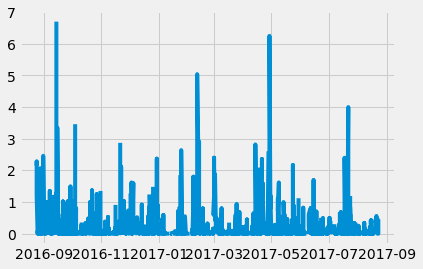

In [34]:
## Use Pandas Plotting with Matplotlib to plot the data
## ** WHY IS THIS NO LONGER WORKING??**
plt.plot(precipitation_df)
#plt.savefig(precip.png) *** need to fix this so it saves, currently gives error that it's not defined

In [35]:
## Use Pandas to calcualte the summary statistics for the precipitation data
## ** I think this is different because I set my >= to 8-24-2016 on my filter 
# because that's the date to give the most recent 365 days of data as the last date is 8-23-2017
precip_summary_df = precipitation_df.describe()
precip_summary_df

,precip
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [94]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(distinct(Station.name))).one()
total_stations
# this seems to be setting up a tuple??

2021-07-23 16:43:16,798 INFO sqlalchemy.engine.base.Engine SELECT count(DISTINCT station.name) AS count_1 
FROM station
2021-07-23 16:43:16,800 INFO sqlalchemy.engine.base.Engine ()


(9)

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
## need to sort Measurement by station, need to use func.count, orderby count desc,
## i assume we need to join to the other sheet to get the name of the station, rather than just it's code? 

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()